In [ ]:
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP
from sko.GA import GA_TSP
import time
from math import radians, cos, sin, asin, sqrt

: 

In [ ]:
num_points = 10
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

In [ ]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [ ]:
# Calculates distance between two coordinates
def distance(lat1, long1, lat2, long2):
     
    # Converts decimal degrees to radians
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    # Radius of earth in miles
    r = 3956
      
    # Haversine formula
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
 
    dist = 2 * r * asin(sqrt(h))

    return dist
    
# test code
lat1 = 53.32055555555556
lat2 = 53.31861111111111
long1 = -1.7297222222222221
long2 =  -1.6997222222222223
print(distance(lat1, lat2, long1, long2), "miles")

In [ ]:
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=num_points, max_iter=10,
                  distance_matrix=distance_matrix)

best_x, best_y = aca.run()

# Plot the result
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
for index in range(0, len(best_points_)):
    ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()

## How differently does ACO perform run to run?

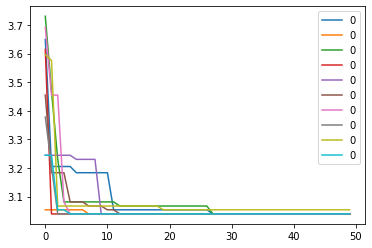

In [12]:
fig, ax = plt.subplots(1, 1)
for i in range(10):

    aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=10, max_iter=50,
                  distance_matrix=distance_matrix)

    best_x, best_y = aca.run()
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax)
    


## How does ACO compare to GA on TSP?

In [15]:
num_points = 50
points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

aca_start = time.time()
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=num_points, max_iter=100,
                  distance_matrix=distance_matrix)

best_x, best_y = aca.run()
aca_stop = time.time()
print("ACO Distance:", best_y)
print("Time elapsed:", aca_stop-aca_start)

ga_start = time.time()
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)

best_points, best_distance = ga_tsp.run()
ga_stop = time.time()
print("GA Distance: ", best_distance[0])
print("GA Time elapsed:", ga_stop-ga_start)


ACO Distance: 6.493865720562726
Time elapsed: 11.395240068435669
GA Distance:  6.89225144366162
GA Time elapsed: 2.2557477951049805
